In [2]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from utils import *
plt.style.use('seaborn-muted')
from matplotlib import patches
import csaps
import warnings
warnings.filterwarnings("ignore")

# The Supply Curve

The supply of a commodity refers to the quantity for which producers or sellers are willing to produce and offer for sale, at a particular price in some given period of time. To answer questions like _"at a given price, what will be the supply of a good in the market?"_, we need to know the market supply curve. A supply curve is simply a curve (or graph) which shows the quantites of a good that can be produced and the prices they will be sold at.

It is good to discern between individual and market supply. **Individual supply** refers to the supply offered by a single firm or producer, while **market supply** refers to the supply offered by all the firms or producers in a market. It is the horizontal summation of the individual supply curves in the market.

The following table and graph will give an example of a market with two firms: A and B.

In [3]:
market_supply = Table().with_columns(
    "Price", make_array(2, 3, 4),
    "Quantity supplied by A", make_array(20, 30, 40),
    "Quantity supplied by B", make_array(30, 40, 50),
    "Market Supply", make_array(50, 70, 90)
)
market_supply

Price,Quantity supplied by A,Quantity supplied by B,Market Supply
2,20,30,50
3,30,40,70
4,40,50,90


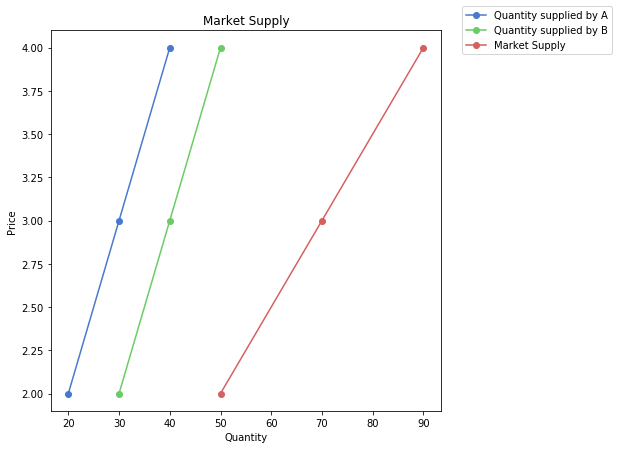

In [4]:
plt.figure(figsize=[7,7])
plt.plot(market_supply.column(1), market_supply.column(0), marker='o')
plt.plot(market_supply.column(2), market_supply.column(0), marker='o')
plt.plot(market_supply.column(3), market_supply.column(0), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Market Supply')
plt.legend(make_array("Quantity supplied by A","Quantity supplied by B","Market Supply"), bbox_to_anchor=(1.04,1), loc="center left")

plt.show()

Market behavior relating to supply is based on the behavior of the individual firms that comprise it. Now, how does an individual firm make its decision about production? It does so based on the costs associated with production. If the price of a good is enough to recover the costs, the firm produces. Generally, costs increase with the quantity of production. So, to induce producers to increase the quantity supplied, the market prices need to increase to compensate for the increased costs.

## Costs

We will split costs into two categories: fixed costs and variable costs.

```{admonition} Definition
**Fixed costs** are costs associated with fixed factors (or inputs) of production. For example, land for a factory, capital equipment like machinery, etc. The quantity of these inputs cannot be changed quickly in the short term. A factory owner cannot purchase land quickly enough to ramp up production in a week. A key point to note is that fixed costs are irrespective of the quantity, i.e., they do not change with the quantity produced.

**Variable costs** are costs associated with variable factors (or inputs) of production. For example, labor, raw materials, etc. The quantity of these inputs can be changed quickly in the short term to adjust supply. A factory owner can hire more laborers or purchase more raw material to increase output. Variable costs change as the supply changes.
```

Another important cost calculation to consider is the marginal cost.

```{admonition} Definition
The **marginal cost** is the additional cost to produce one more unit of output. It can be calculated as the difference between the total cost and the current level of output and the total cost at the previous level of output.
```

Below is a table with the following costs incurred by the firm:

* **Output:** Units produced and supplied
* **Total Fixed Cost (TFC):** Cost incurred by firm on usage of all fixed factors.
* **Total Variable Cost (TVC):** Cost incurred by firm on usage of all variable factors.
* **Total Cost (TC):** Sum of the total fixed and variable costs.
* **Marginal Cost (MC)**
* **Average Fixed Cost (AFC):** Cost per unit of fixed factors. It can be calculated as the Total Fixed Cost divided by the corresponding output level. 
* **Average Variable Cost (AVC):** Cost per unit of variable factors. It can be calculated as the Total Variable Cost divided by the corresponding output level. 
* **Average Total Cost (ATC):** Total cost per unit. This is the sum of the Average Fixed Cost and the Average Variable Cost.

In [7]:
individual_firm_costs = Table.read_table('supply_data.csv')
individual_firm_costs.show()

Output,Total Fixed Cost,Total Variable Cost,Total Cost,Average Fixed Cost,Average Variable Cost,Average Total Cost,Marginal Cost
0,50,0,50,0,0,0,0
1,50,50,100,50,50,100,50
2,50,78,128,25,39,64,28
3,50,98,148,16.6667,32.6667,49.3333,20
4,50,112,162,12.5,28,40.5,14
5,50,130,180,10,26,36,18
6,50,150,200,8.33333,25,33.3333,20
7,50,175,225,7.14286,25,32.1429,25
8,50,204,254,6.25,25.5,31.75,29
9,50,242,292,5.55556,26.8889,32.4444,38


Let's create some visualizations to understand the relationships of the different cost curves.

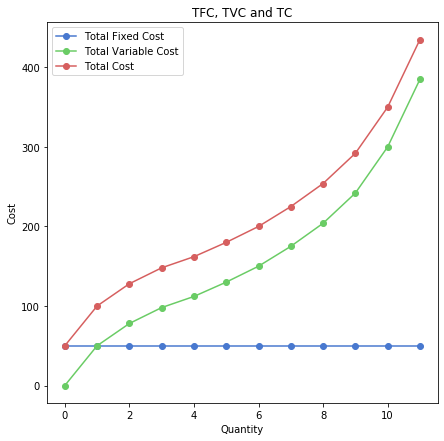

In [8]:
plt.figure(figsize=[7,7])
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Fixed Cost"), marker='o')
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Variable Cost"), marker='o')
plt.plot(individual_firm_costs.column("Output"), individual_firm_costs.column("Total Cost"), marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('TFC, TVC and TC')
plt.legend(make_array("Total Fixed Cost","Total Variable Cost","Total Cost"))

plt.show()

There are two important things to notice about the graph above. First, the total fixed cost is flat. This is because the fixed cost does not change regardless of quantity produced. Second, the vertical difference between the total variable cost and total cost is the TFC. This is because $\text{TC} = \text{TVC} + \text{TFC}$.

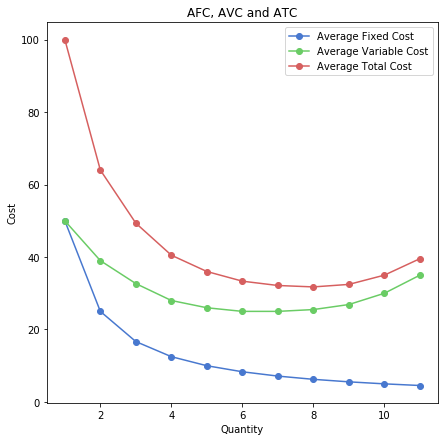

In [9]:
plt.figure(figsize=[7,7])
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Fixed Cost")[1:], marker='o')
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Variable Cost")[1:], marker='o')
plt.plot(individual_firm_costs.column("Output")[1:], individual_firm_costs.column("Average Total Cost")[1:], marker='o')
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('AFC, AVC and ATC')
plt.legend(make_array("Average Fixed Cost","Average Variable Cost","Average Total Cost"))

plt.show()

From the graph above, note that:

- The average fixed cost is decreasing throughout. This is because at higher levels of production, the fixed cost is divided across more units. This implies that the difference between the ATC and AVC decreases as we increase production, since $\text{ATC} = \text{AVC} + \text{AFC}$.
- The AVC and ATC slope down initially and then slope up. This represents decreasing and then increasing marginal cost. Marginal cost initially decreases due to efficiencies in producing at scale, but then increases due to the law of variable proportions. 

Now let's introduce the marginal cost curve:

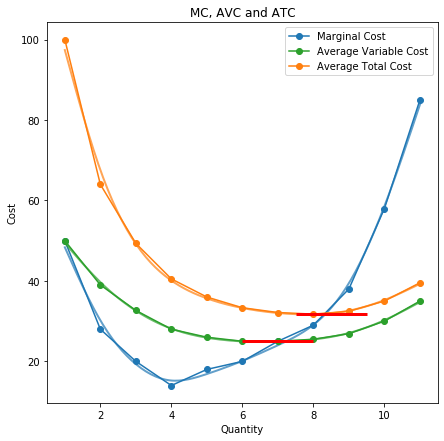

In [11]:
output = individual_firm_costs.column("Output")[1:]
mc = individual_firm_costs.column("Marginal Cost")[1:]
avc = individual_firm_costs.column("Average Variable Cost")[1:]
atc = individual_firm_costs.column("Average Total Cost")[1:]

sp_mc = csaps.UnivariateCubicSmoothingSpline(output, mc, smooth=0.85)
sp_avc = csaps.UnivariateCubicSmoothingSpline(output, avc, smooth=0.85)
sp_atc = csaps.UnivariateCubicSmoothingSpline(output, atc, smooth=0.85)

output_s = np.linspace(output.min(), output.max(), 150)
mc_s = sp_mc(output_s)
avc_s = sp_avc(output_s)
atc_s = sp_atc(output_s)

plt.figure(figsize=[7,7])
plt.plot(output, mc, marker = 'o', color = 'tab:blue')
plt.plot(output_s, mc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:blue')
plt.plot(output, avc, marker = 'o', color = 'tab:green')
plt.plot(output_s, avc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:green')
plt.plot(output, atc, marker = 'o', color = 'tab:orange')
plt.plot(output_s, atc_s, alpha=0.7, lw = 2, label='_nolegend_', color = 'tab:orange')
plt.hlines(y=min(avc), xmin = 6, xmax = 8, lw=3, color='r', zorder = 10)
plt.hlines(y=min(atc), xmin = 7.5, xmax = 9.5, lw=3, color='r', zorder = 10)
plt.xlabel('Quantity')
plt.ylabel('Cost')
plt.title('MC, AVC and ATC')
plt.legend(make_array("Marginal Cost","Average Variable Cost","Average Total Cost"))

plt.show()

Notice that the MC curve intersects the ATC and AVC curves at their minima. This is because when MC is below the AVC and ATC, it brings down the average since it costs less to produce an additional unit. But as MC begins to increase and surpasses the ATC and AVC cost curves, it will surpass the intersection, and pulls up the AVC and ATC curves. Therefore, it intersects at the minima.

## Production and Firm Behavior

A company decides to produce if the price is greater than or equal to its average variable cost. There are 3 different scenarios: 

- A firm does not produce at all
- It produces at a loss-minimizing quantity
- It produces at a profit
   
Profits are calculated as total revenue less total costs, where total revenue is price times quantity. For any price that is less than AVC, the firm will not produce at all. This is because for any amount of production, they will lose money. In this case, they shut down and the loss is limited to its fixed costs. In this example, we can see this for prices 24 and below.

No production


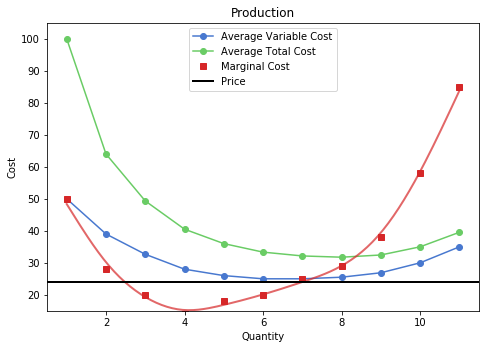

In [12]:
firm_behaviour(24, individual_firm_costs)

For any price that lies above the AVC curve but below the ATC curve, the firm will produce at a loss-minimising quantity. This is because for some levels of production, they will make revenue that is more than the total variable cost of production but is still less than the total cost, which includes the fixed cost. While they still lose money, they have offset some of the losses they would have incurred from the fixed cost. In our example, we see this for prices between 25 and 31. The red patch in the plot shows the loss.

Production at loss minimising quantity


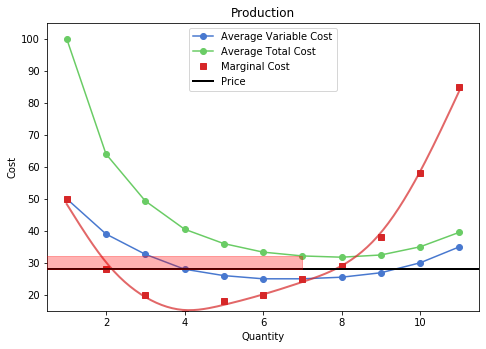

In [13]:
firm_behaviour(28, individual_firm_costs)

If the price is above the ATC curve, the firm produces at a profit. In this example, it is at prices 32 and above. The green patch shows the profit.

Production at a profit


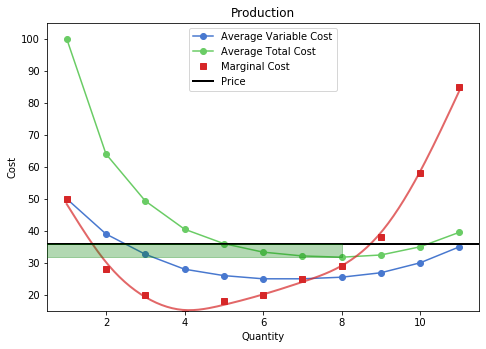

In [14]:
firm_behaviour(36, individual_firm_costs)

So, we have seen that a firm produces if the price is above the AVC. The question now is: what is the level of production?

A profit-maximising firm will produce until price is less than or equal to marginal cost. In the above example, the firm produces 8 units. At the 8th unit, the marginal cost to produce that unit is 28, which is less than the price of 36. Thus the firm gets more revenue for the 8th unit than the cost to produce that unit. But the 9th unit costs an additional 38 to produce. The price of 36 is not enough to cover it. Thus it does not produce the 9th unit.

Therefore, based on the price, each firm looks at its costs and makes a decision to produce. At low prices, only the firms with the lowest production costs produce. As the price increases, firms with higher production costs find it feasible to produce and begin to supply. Thus, the market supply rises with higher prices. Firms with lower costs make extra profits. 